In [1]:
import numpy as np
from ase import Atoms
from ase.build import molecule
from ase.calculators.tip4p import TIP4P
from ase.visualize import view
np.random.seed(42)

In [19]:
atoms = Atoms()
atoms.cell = (20, 20, 20)

h2o = molecule('H2O')
h2o.rotate('z', 'x')
h2o.rotate('x', 'y')
h2o.translate([2,2,0])
translate_vectors = [[i, j, 0] for i in [0,4,8,12,16] for j in [0,4,8,12,16]]

for i, vec in enumerate(translate_vectors):
    add = h2o.copy()
    add.set_tags([i]*len(add))
    add.translate(vec)
    atoms += add
initial = atoms.copy()
initial.pbc = True

In [21]:
# view(initial)

In [22]:
import sys
sys.path.append('../')
from asetil.monte_carlo.monte_carlo import MonteCarlo
from asetil.monte_carlo.sampler import TranslateSampler, XYZAxesRotateSampler
from asetil.monte_carlo.selector import RandomTagSelector
from asetil.monte_carlo.logger import MCPrintLogger, MCPFileLogger, MCInMemoryLogger

In [24]:
d = 1e-8
samplers = [
    TranslateSampler(tag_selector=RandomTagSelector(), x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_range=(-d, d)),
    XYZAxesRotateSampler(tag_selector=RandomTagSelector(), x_axis_range=(-d, d), y_axis_range=(-d, d), z_axis_range=(-90,90))
]
loggers = [
    MCPrintLogger(log_interval=100),
    MCPFileLogger(log_interval=100, out_file='example1.log', force_overwrite=True),
    MCInMemoryLogger(log_interval=10)
]
mc = MonteCarlo(temperature=200, max_iter=3000, samplers=samplers, loggers=loggers)
initial.calc = TIP4P()
ret = mc.run(initial)
ret.wrap()

initializing loggers
 iteration,    sampler.name, latest_accepted_energy,    delta_e,   acceptability,  is_accepted
         0,       Translate,              -0.457996,   0.000520,        0.970291,         True
       100,       Translate,              -2.575166,  -0.073923,        1.000000,         True
       200,       Translate,              -3.070787,  -0.047790,        1.000000,         True
       300,       XYZRotate,              -3.284181,   0.087530,        0.006228,        False
       400,       XYZRotate,              -3.878597,   0.516250,        0.000000,        False
       500,       Translate,              -4.416103,   0.002458,        0.867067,         True
       600,       XYZRotate,              -4.863528,   0.098056,        0.003381,        False
       700,       XYZRotate,              -4.974770,   0.050998,        0.051870,         True
       800,       XYZRotate,              -4.986622,   0.193846,        0.000013,        False
       900,       XYZRotate, 

In [26]:
view(ret)

<Popen: returncode: None args: ['c:\\Users\\User\\AppData\\Local\\pypoetry\\...>

In [27]:
import pandas as pd
log, columns = loggers[2].get_log(with_columns=True)
df = pd.DataFrame(log, columns=columns)
df

,iteration,sampler.name,latest_accepted_energy,delta_e,acceptability,is_accepted
0,0,Translate,-0.457996,0.000520,9.702912e-01,True
1,10,XYZRotate,-0.608630,0.027600,2.016110e-01,False
2,20,Translate,-0.716981,0.006050,7.039509e-01,False
3,30,Translate,-1.102190,-0.090995,1.000000e+00,True
4,40,Translate,-1.362828,0.060121,3.054995e-02,False
...,...,...,...,...,...,...
295,2950,XYZRotate,-6.089805,-0.000728,1.000000e+00,True
296,2960,XYZRotate,-6.097539,0.415426,3.401999e-11,False
297,2970,XYZRotate,-6.092180,0.005359,7.327628e-01,True
298,2980,XYZRotate,-6.098033,0.135131,3.934217e-04,False


Text(0, 0.5, 'latest accepted energy / eV')

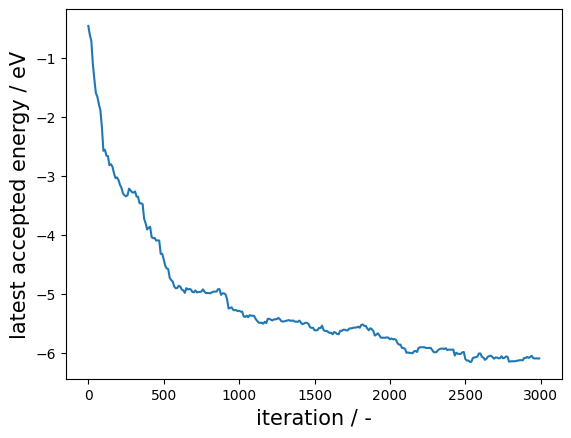

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df['iteration'], df['latest_accepted_energy'])
ax.set_xlabel('iteration / -', fontsize=15)
ax.set_ylabel('latest accepted energy / eV', fontsize=15)